In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
x_train=pd.read_csv('train.csv')
x_test=pd.read_csv('test.csv')

In [3]:
x_train.head(20)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    127         120       RL          NaN     4928   Pave   NaN      IR1   
1    889          20       RL         95.0    15865   Pave   NaN      IR1   
2    793          60       RL         92.0     9920   Pave   NaN      IR1   
3    110          20       RL        105.0    11751   Pave   NaN      IR1   
4    422          20       RL          NaN    16635   Pave   NaN      IR1   
5   1197          60       RL         58.0    14054   Pave   NaN      IR1   
6    561          20       RL          NaN    11341   Pave   NaN      IR1   
7   1041          20       RL         88.0    13125   Pave   NaN      Reg   
8    503          20       RL         70.0     9170   Pave   NaN      Reg   
9    576          50       RL         80.0     8480   Pave   NaN      Reg   
10   449          50       RM         50.0     8600   Pave   NaN      Reg   
11   833          60       RL         44.0     9548   Pave   NaN      IR1   
12   277          20       RL        129.0     9196   Pave   NaN      IR1   
13    84          20       RL         80.0     8892   Pave   NaN      IR1   
14   888          50       RL         59.0    16466   Pave   NaN      IR1   
15  1013          70       RL         55.0    10592   Pave   NaN      Reg   
16  1154          30       RM          NaN     5890   Pave   NaN      Reg   
17   728          20       RL         64.0     7314   Pave   NaN      Reg   
18   270          20       RL          NaN     7917   Pave   NaN      IR1   
19  1105         160       RM         24.0     2016   Pave   NaN      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1          Lvl    AllPub    Inside       Mod        NAmes       Norm   
2          Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3          Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4          Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
5          Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
6          Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
7          Lvl    AllPub    Corner       Gtl       Sawyer       Norm   
8          Lvl    AllPub    Corner       Gtl      Edwards      Feedr   
9          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
10         Bnk    AllPub    Inside       Gtl       IDOTRR       Norm   
11         Lvl    AllPub   CulDSac       Gtl      CollgCr       Norm   
12         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
13         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
14         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
15         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
16         Lvl    AllPub    Corner       Gtl       IDOTRR       Norm   
17         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
18         Lvl    AllPub    Corner       Gtl      Edwards       Norm   
19         Lvl    AllPub    Inside       Gtl       BrDale       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0        Norm   TwnhsE     1Story            6            5       1976   
1        Norm     1Fam     1Story            8            6       1970   
2        Norm     1Fam     2Story            7            5       1996   
3        Norm     1Fam     1Story            6            6       1977   
4        Norm     1Fam     1Story            6            7       1977   
5        Norm     1Fam     2Story            7            5       2006   
6        Norm     1Fam     1Story            5            6       1957   
7        Norm     1Fam     1Story            5            4       1957   
8        Norm     1Fam     1Story            5            7       1965   
9        Norm     1Fam     1.5Fin            5            5       1947   
10       Norm     1Fam     1.5Fin            6            6  

In [4]:
x_train.shape

(1168, 81)

In [5]:
x_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

In [6]:
x_test.shape

(292, 80)

In [7]:
x_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027   
std       1.124343    30.145255     20.785185   182.595606   462.664785   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean     46.647260   569.721747  1061.095034  1169.860445   348.826199   
std     163.520016   449.375525   442.272249   391.161983   439.696370   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   216.000000   799.000000   892.000000     0.000000   
50%       0.000000   474.000000  1005.500000  1096.500000     0.000000   
75%       0.000000   816.000000  1291.500000  1392.000000   729.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1168.000000  1168.000000   1168.000000   1168.000000  1168.000000   
mean       6.380137  1525.066781      0.425514      0.055651     1.562500   
std       50.892844   528.042957      0.521615      0.236699     0.551882   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1143.250000      0.000000      0.000000     1.000000   
50%        0.000000  1468.500000      0.000000      0.000000     2.000000   
75%        0.000000  1795.000000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1168.000000   1168.000000   1168.000000   1168.000000  1168.000000   
mean      0.388699      2.884418      1.045377      6.542808     0.617295   
std       0.504929      0.817229      0.216292      1.598484     0.650575   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1104.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean   1978.193841     1.776541   476.860445    96.206336    46.559932   
std      24.890704     0.745554   214.466769   126.158988    66.381023   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   338.000000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    24.000000   
75%    2002.000000     2.000000   576.000000   171.000000    70.000000   
max    2

In [241]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [8]:
cat_col=list(x_train.select_dtypes(include='object'))
num_col=list(x_train.select_dtypes(include=[np.number]))

In [243]:
cat_col

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [244]:
num_col

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [245]:
x_train.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [409]:
1091/1168

0.9340753424657534

Missing Values and Imputation Technique
1. Lot Frontage-214: Iterative Imputer
2. Alley-1091: More than 93% missing values. Drop the feature
3. BsmtQual-30, BsmtCond-30, BsmtExposure-31, BsmtFinType1-30, BsmtFinType2-31: Iterative Imputer
4. FireplaceQu-551: Fill the missing values with no fireplace
5. GarageType-64, GarageYrBlt-64, GarageFinish-64, GarageQual-64, GarageCond-64: Iterative Imputer
6. PoolQC-1161: Fill the missing values with no pool
7. Fence-931: Fill the missing values with no pool
8. MiscFeature-1124: Fill the missing values with no feature

In [9]:
x_train['Alley'].value_counts()

Grvl    41
Pave    36
Name: Alley, dtype: int64

In [10]:
x_train.drop(columns='Alley',axis=1,inplace=True)

In [11]:
x_train['BsmtQual'].value_counts()

TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64

In [12]:
x_train['BsmtQual'].isna().sum()

30

In [13]:
#filling missing values with NA
x_train['BsmtQual'].fillna('NA',inplace=True)

In [14]:
x_train['BsmtQual'].value_counts()

TA    517
Gd    498
Ex     94
NA     30
Fa     29
Name: BsmtQual, dtype: int64

In [15]:
x_train['BsmtQual'].isna().sum()

0

In [16]:
x_train['BsmtCond'].value_counts()

TA    1041
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64

In [17]:
x_train['BsmtCond'].isna().sum()

30

In [18]:
#filling missing values with NA
x_train['BsmtCond'].fillna('NA',inplace=True)

In [19]:
x_train['BsmtCond'].value_counts()

TA    1041
Gd      56
Fa      39
NA      30
Po       2
Name: BsmtCond, dtype: int64

In [20]:
x_train['BsmtExposure'].value_counts()

No    756
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64

In [21]:
x_train['BsmtExposure'].isna().sum()

31

In [22]:
#filling missing values with NA
x_train['BsmtExposure'].fillna('NA',inplace=True)

In [23]:
x_train['BsmtExposure'].value_counts()

No    756
Av    180
Gd    108
Mn     93
NA     31
Name: BsmtExposure, dtype: int64

In [24]:
x_train['BsmtFinType1'].value_counts()

Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64

In [25]:
x_train['BsmtFinType1'].isna().sum()

30

In [26]:
#filling missing values with NA
x_train['BsmtFinType1'].fillna('NA',inplace=True)
x_train['BsmtFinType1'].value_counts()

Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
NA      30
Name: BsmtFinType1, dtype: int64

In [27]:
x_train['BsmtFinType2'].value_counts()

Unf    1002
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64

In [28]:
x_train['BsmtFinType2'].isna().sum()

31

In [29]:
#filling missing values with NA
x_train['BsmtFinType2'].fillna('NA',inplace=True)
x_train['BsmtFinType2'].value_counts()

Unf    1002
Rec      43
LwQ      40
NA       31
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64

In [30]:
x_train['FireplaceQu'].isna().sum()

551

In [31]:
x_train['Fireplaces'].value_counts()

0    551
1    518
2     94
3      5
Name: Fireplaces, dtype: int64

In [32]:
#filling missing values with NA as there are no fireplaces in the same amount of entries
x_train['FireplaceQu'].fillna('NA',inplace=True)
x_train['FireplaceQu'].value_counts()

NA    551
Gd    301
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64

In [33]:
x_train['Fireplaces'].value_counts()

0    551
1    518
2     94
3      5
Name: Fireplaces, dtype: int64

In [34]:
x_train['GarageType'].isna().sum()

64

In [35]:
x_train['GarageArea'].loc[x_train['GarageType'].isna()]

48      0
72      0
74      0
105     0
116     0
123     0
127     0
149     0
180     0
184     0
197     0
227     0
314     0
327     0
333     0
378     0
396     0
420     0
429     0
468     0
474     0
491     0
510     0
537     0
545     0
546     0
548     0
584     0
585     0
597     0
614     0
615     0
636     0
655     0
656     0
664     0
683     0
696     0
718     0
726     0
731     0
769     0
775     0
804     0
811     0
831     0
846     0
867     0
884     0
902     0
952     0
956     0
959     0
1018    0
1023    0
1035    0
1046    0
1065    0
1107    0
1117    0
1139    0
1145    0
1149    0
1159    0
Name: GarageArea, dtype: int64

In [36]:
#filling missing values in Garage cahracteristics with "NA" as the garage area is zero for thoses entries.
x_train['GarageType'].fillna('NA',inplace=True)
x_train['GarageFinish'].fillna('NA',inplace=True)
x_train['GarageQual'].fillna('NA',inplace=True)
x_train['GarageCond'].fillna('NA',inplace=True)

In [37]:
index=x_train.index[x_train['GarageYrBlt'].isna()]

In [38]:
for i in index:
    x_train.loc[i,'GarageYrBlt']=x_train.loc[i,'YearBuilt']

In [39]:
x_train.loc[index,['YearBuilt','GarageYrBlt']]

YearBuilt  GarageYrBlt
48         1946       1946.0
72         1935       1935.0
74         1931       1931.0
105        1971       1971.0
116        2004       2004.0
123        1920       1920.0
127        1940       1940.0
149        1924       1924.0
180        1922       1922.0
184        1910       1910.0
197        1911       1911.0
227        1956       1956.0
314        1959       1959.0
327        1978       1978.0
333        1926       1926.0
378        1900       1900.0
396        1910       1910.0
420        1972       1972.0
429        1924       1924.0
468        1910       1910.0
474        1941       1941.0
491        1965       1965.0
510        1936       1936.0
537        1970       1970.0
545        1940       1940.0
546        1923       1923.0
548        1910       1910.0
584        2006       2006.0
585        1925       1925.0
597        1991       1991.0
614        1914       1914.0
615        1940       1940.0
636        1910       1910.0
655        1875       1875.0
656        1971       1971.0
664        1961       1961.0
683        1914       1914.0
696        1959       1959.0
718        1914       1914.0
726        1935       1935.0
731        1971       1971.0
769        1915       1915.0
775        1987       1987.0
804        1912       1912.0
811        2007       2007.0
831        1972       1972.0
846        1922       1922.0
867        1916       1916.0
884        1900       1900.0
902        1970       1970.0
952        1975       1975.0
956        1920       1920.0
959        1940       1940.0
1018       1968       1968.0
1023       1912       1912.0
1035       1955       1955.0
1046       1941       1941.0
1065       1958       1958.0
1107       1954       1954.0
1117       1947       1947.0
1139       1990       1990.0
1145       1971       1971.0
1149       1949       1949.0
1159       1977       1977.0

In [40]:
x_train['MasVnrType'].fillna('None',inplace=True)
x_train['MasVnrArea'].fillna(0,inplace=True)

In [41]:
x_train['PoolQC'].fillna('NA',inplace=True)
x_train['Fence'].fillna('NA',inplace=True)
x_train['MiscFeature'].fillna('NA',inplace=True)

In [42]:
x_train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [43]:
x_train['LotFrontage'].fillna(x_train.groupby(['LotShape','LandContour'])['LotFrontage'].transform('mean'),inplace=True)

In [44]:
x_train.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      1
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [45]:
x_train['LotFrontage'].fillna(x_train['LotFrontage'].mean(),inplace=True)

In [46]:
x_train.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [47]:
cat_col=list(x_train.select_dtypes(include='object'))
len(cat_col)

42

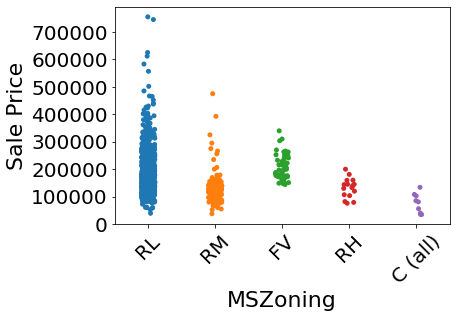

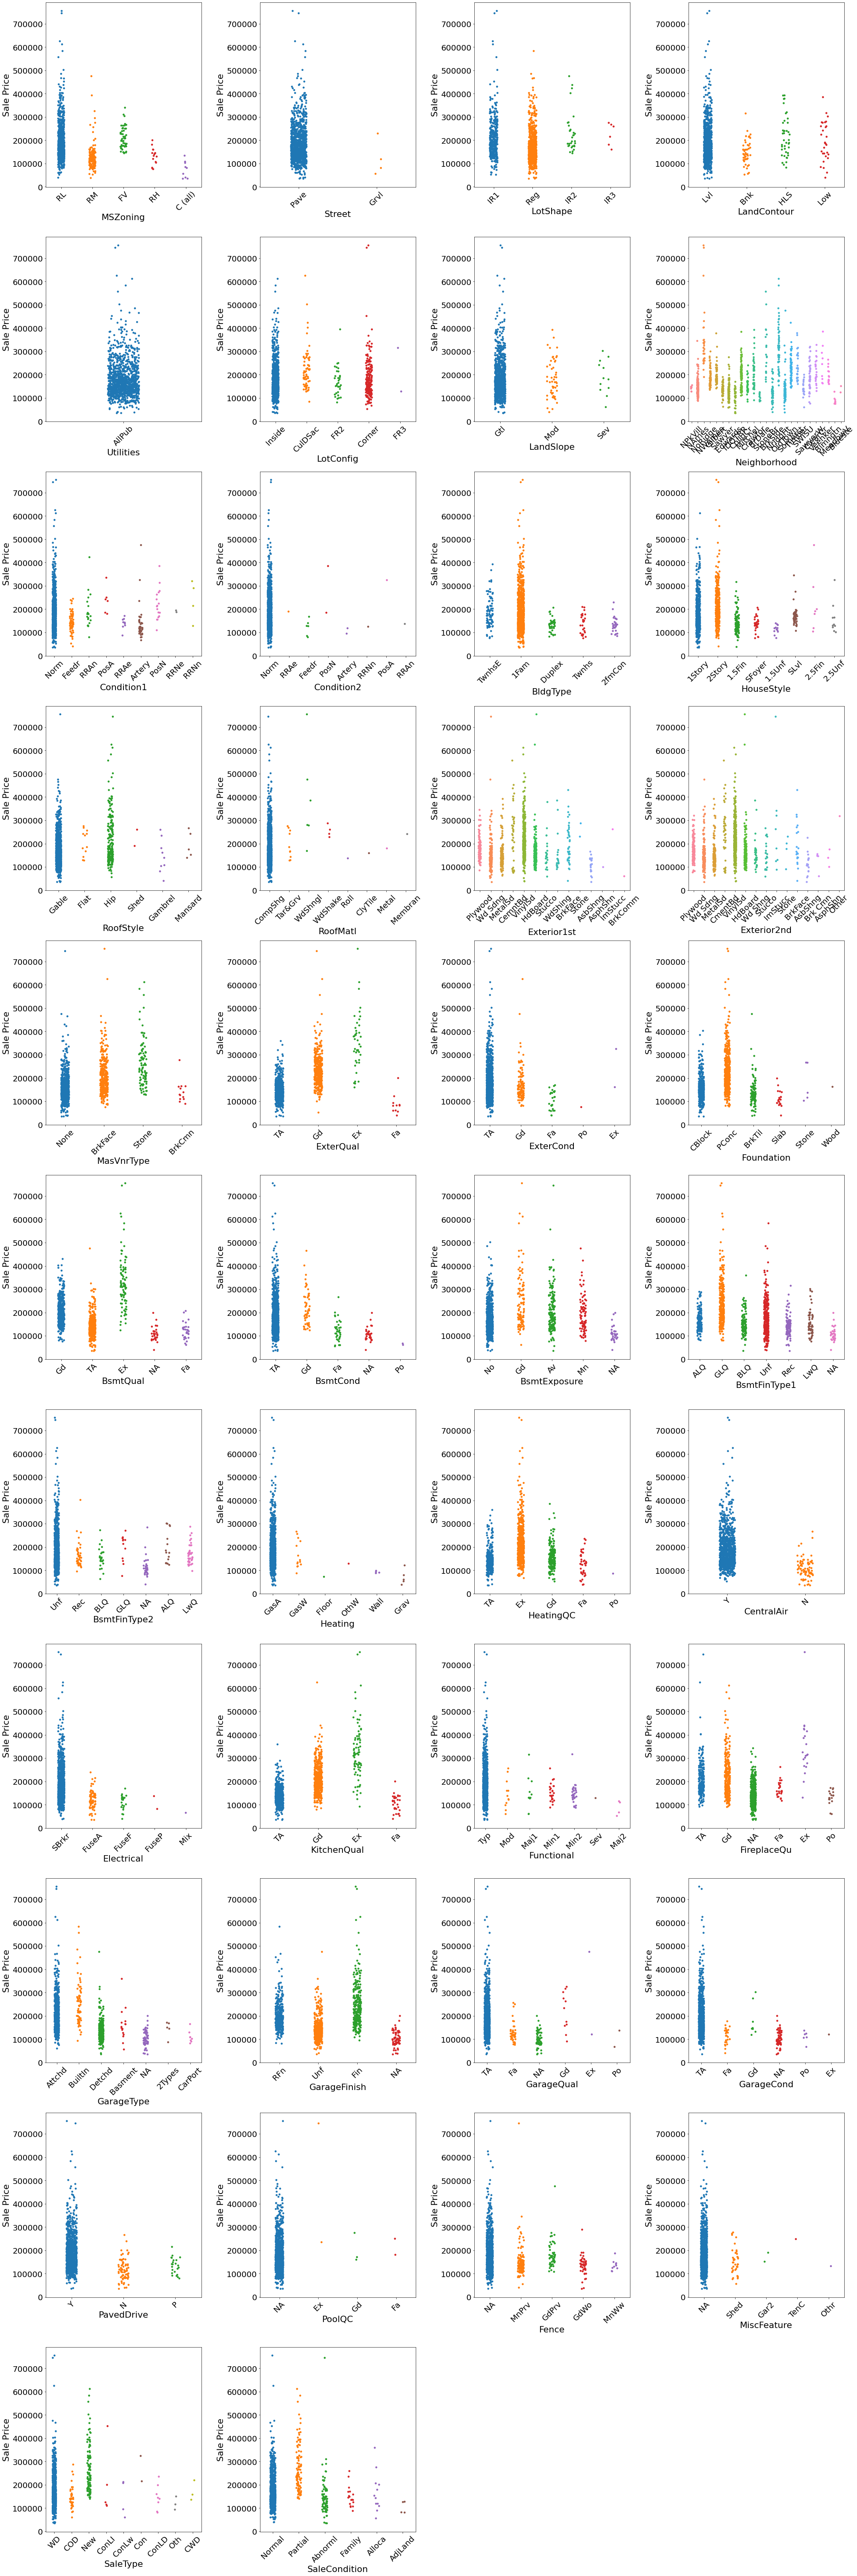

In [286]:
plt.figure(figsize=(30,90))
plotnumber=1

for col in cat_col:
    if plotnumber<=43:
        ax=plt.subplot(11,4,plotnumber)
        sns.stripplot(x=x_train[col],y=x_train['SalePrice'])
        plt.xlabel(col,fontsize=22)
        plt.ylabel('Sale Price',fontsize=22)
        plt.xticks(fontsize=20,rotation=45)
        plt.yticks(fontsize=20)
        plotnumber+=1
plt.tight_layout()

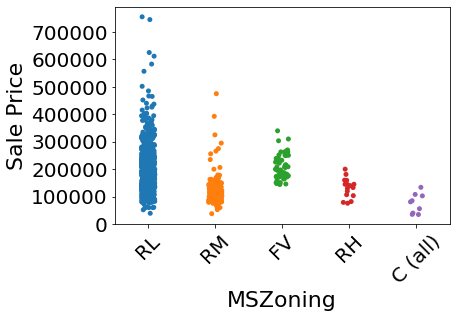

In [51]:
sns.stripplot(x=x_train['MSZoning'],y=x_train['SalePrice'])
plt.xlabel('MSZoning',fontsize=22)
plt.ylabel('Sale Price',fontsize=22)
plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.savefig('img1.png')

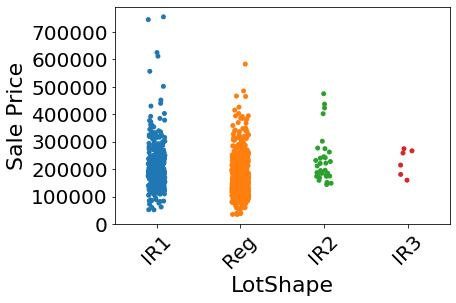

In [54]:
sns.stripplot(x=x_train['LotShape'],y=x_train['SalePrice'])
plt.xlabel('LotShape',fontsize=22)
plt.ylabel('Sale Price',fontsize=22)
plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.savefig('img2.png')

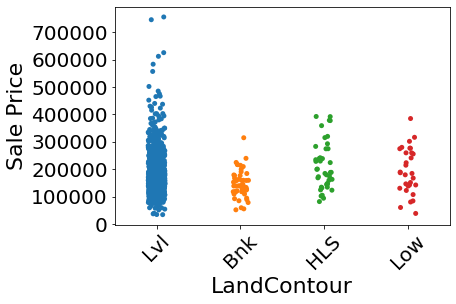

In [57]:
sns.stripplot(x=x_train['LandContour'],y=x_train['SalePrice'])
plt.xlabel('LandContour',fontsize=22)
plt.ylabel('Sale Price',fontsize=22)
plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.savefig('img3.png')

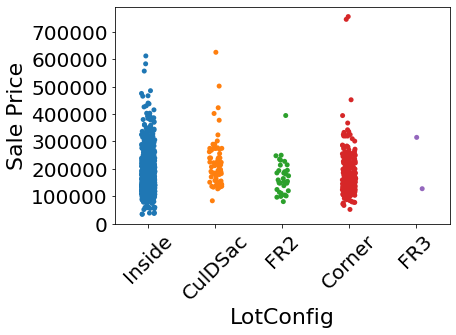

In [58]:
sns.stripplot(x=x_train['LotConfig'],y=x_train['SalePrice'])
plt.xlabel('LotConfig',fontsize=22)
plt.ylabel('Sale Price',fontsize=22)
plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.savefig('img4.png')

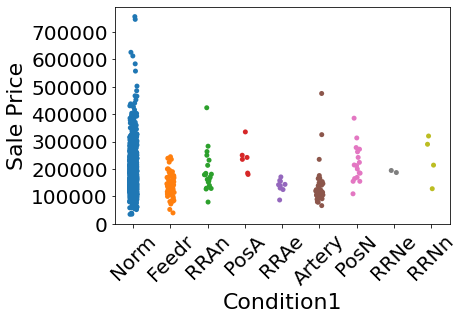

In [59]:
sns.stripplot(x=x_train['Condition1'],y=x_train['SalePrice'])
plt.xlabel('Condition1',fontsize=22)
plt.ylabel('Sale Price',fontsize=22)
plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.savefig('img5.png')

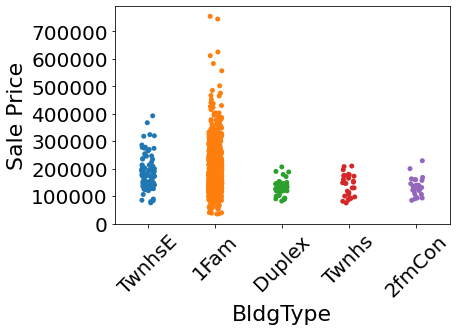

In [60]:
sns.stripplot(x=x_train['BldgType'],y=x_train['SalePrice'])
plt.xlabel('BldgType',fontsize=22)
plt.ylabel('Sale Price',fontsize=22)
plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.savefig('img6.png')

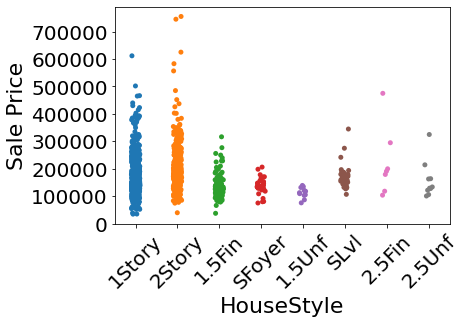

In [61]:
sns.stripplot(x=x_train['HouseStyle'],y=x_train['SalePrice'])
plt.xlabel('HouseStyle',fontsize=22)
plt.ylabel('Sale Price',fontsize=22)
plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.savefig('img7.png')

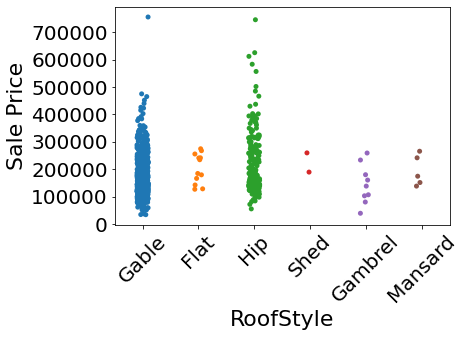

In [62]:
sns.stripplot(x=x_train['RoofStyle'],y=x_train['SalePrice'])
plt.xlabel('RoofStyle',fontsize=22)
plt.ylabel('Sale Price',fontsize=22)
plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.savefig('img8.png')

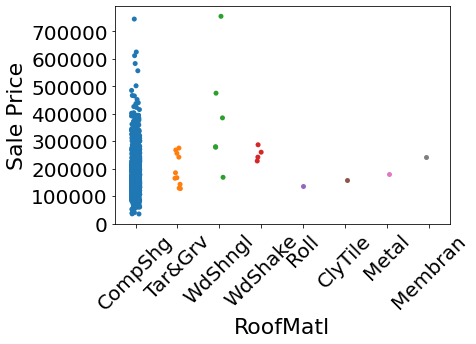

In [63]:
sns.stripplot(x=x_train['RoofMatl'],y=x_train['SalePrice'])
plt.xlabel('RoofMatl',fontsize=22)
plt.ylabel('Sale Price',fontsize=22)
plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.savefig('img9.png')

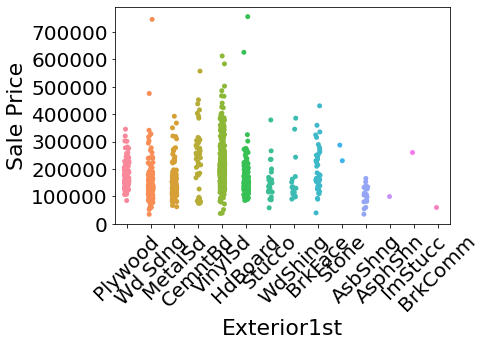

In [64]:
sns.stripplot(x=x_train['Exterior1st'],y=x_train['SalePrice'])
plt.xlabel('Exterior1st',fontsize=22)
plt.ylabel('Sale Price',fontsize=22)
plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.savefig('img10.png')

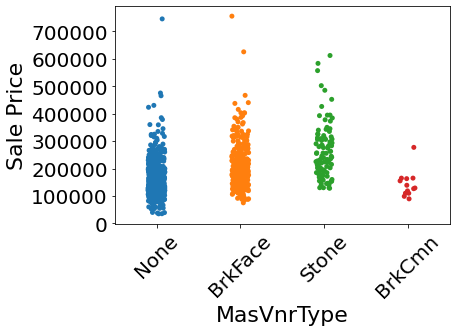

In [65]:
sns.stripplot(x=x_train['MasVnrType'],y=x_train['SalePrice'])
plt.xlabel('MasVnrType',fontsize=22)
plt.ylabel('Sale Price',fontsize=22)
plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.savefig('img11.png')

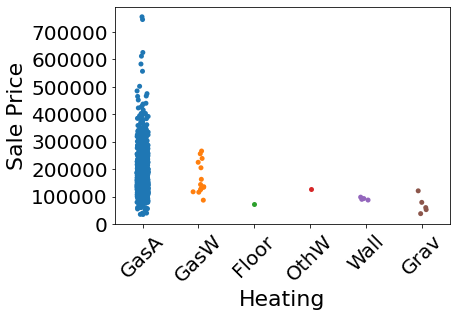

In [66]:
sns.stripplot(x=x_train['Heating'],y=x_train['SalePrice'])
plt.xlabel('Heating',fontsize=22)
plt.ylabel('Sale Price',fontsize=22)
plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.savefig('img12.png')

1. The decreasing order of price based on various zone is:
    1-Residential Low Density
    2-Floating Village Residential
    3-Residential High Density
    4-Residential Medium Density
    5-Commercial
2. Only 4 out of 1168 properties have paved roads.
3. The minimum price of 'Moderately Irregular' and 'Irregular' shaped properties is higher than 'Regular' and 'Slightly Irregular' shaped.
4. The minimum price of 'Hillside - Significant slope from side to side' properties is higher than other land contours.
5. The minimum price of 'Inside Lot' is least among all Lot Configuration.
6. The minimum price of properties which are in close proximity to positive offsite feature like park, green belt, etc. or Within 200' of East-West Railroad is very high as compared to other properties.
7. The minimum price of properties whose dwelling type is Single-family Detached is the least.
8. The minimum price of properties whose dwelling style is '2.5 Story' and 'Split Level' is very high as compared to '1 Story', '1.5 Story', '2 Story' or 'Split Foyer'.
9. The minimum price of properties based on roof type in decreaisng order is:
    1-Shed
    2-Mansard
    3-Flat
    4-Hip
    5-Gable
    6-Gabrel (Barn)
10. The highest price of Flat,Shed, Gabrel(Barn) and Mansard is very less as compared to Gable and Hip.
11. Majority of the properties are made up of Standard (Composite) Shingle.
12. The minimum price of the properties whose roof are made up of Wood Shakes is highest.
13. The minimum price of properties are in the lower range when the exterior covering is made up of Wood Siding, Vinyl Siding, Brick Face or Asbestos Shingles.
14. The minimum price is very high if the masonry veneer is of Stone.
15. The minimum price is high if the foundation is made up of Wood, Stone or Poured Concrete.
16. Majority of the properties have Gas forced warm air furnace.

In [68]:
num_col=list(x_train.select_dtypes(include=[np.number]))
len(num_col)

38

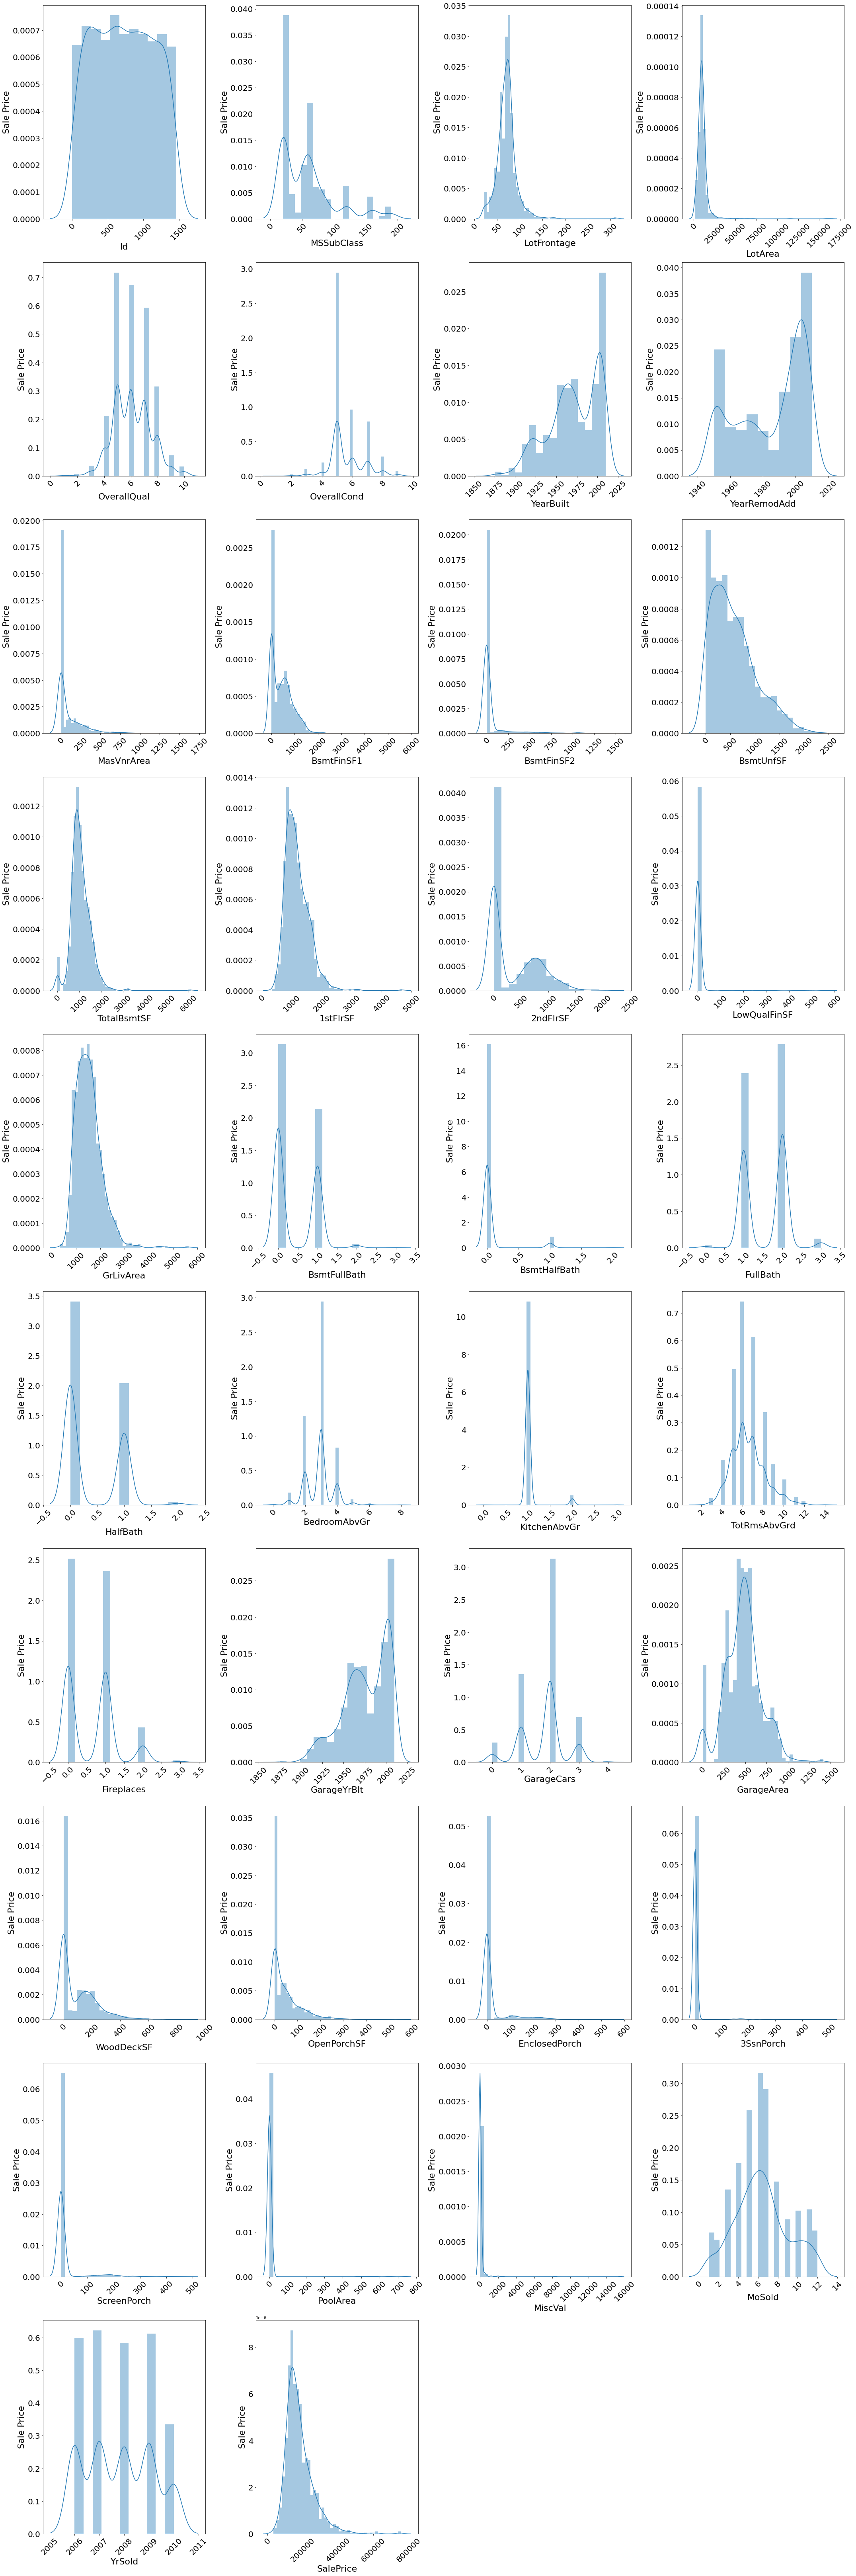

In [289]:
plt.figure(figsize=(30,90))
plotnumber=1

for col in num_col:
    if plotnumber<=38:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(x_train[col])
        plt.xlabel(col,fontsize=22)
        plt.ylabel('Sale Price',fontsize=22)
        plt.xticks(fontsize=20,rotation=45)
        plt.yticks(fontsize=20)
        plotnumber+=1
plt.tight_layout()

There is skewness in the dataset. Let us address this by treating outliers.

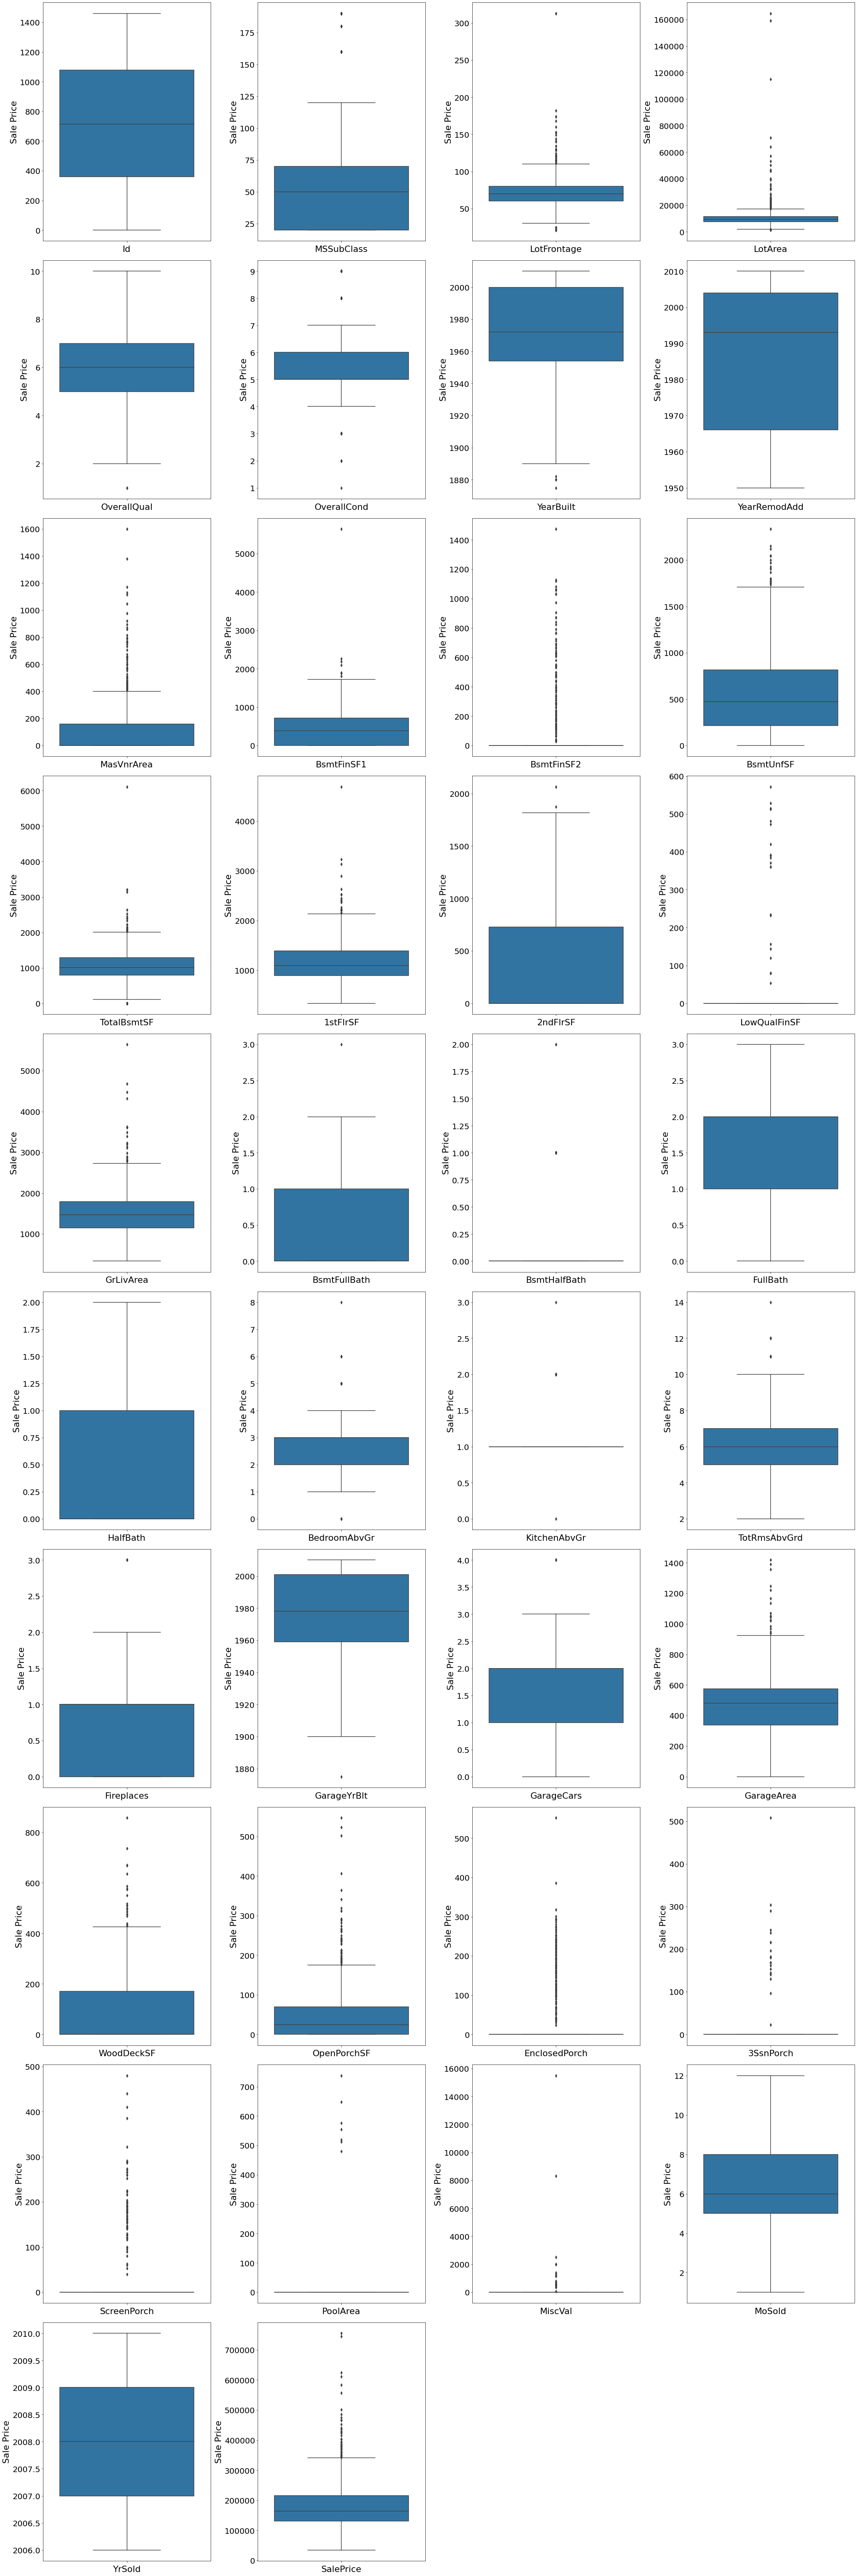

In [290]:
plt.figure(figsize=(30,90))
plotnumber=1

for col in num_col:
    if plotnumber<=38:
        ax=plt.subplot(10,4,plotnumber)
        sns.boxplot(y=x_train[col],orient="v")
        plt.xlabel(col,fontsize=22)
        plt.ylabel('Sale Price',fontsize=22)
        plt.xticks(fontsize=20,rotation=45)
        plt.yticks(fontsize=20)
        plotnumber+=1
plt.tight_layout()

In [69]:
num_col 
#'BsmtFinSF2,'LowQualFinSF', 'BsmtHalfBath','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal',

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [70]:
outliers=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF',
          '1stFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF',]
from scipy import stats
z=np.abs(stats.zscore(x_train[outliers]))

In [71]:
index=(np.where(z>3)[0])
x_train=x_train.drop(x_train.index[index])

In [72]:
x_train.shape

(1077, 80)

In [73]:
common_value_col=['BsmtFinSF2','LowQualFinSF', 'BsmtHalfBath','KitchenAbvGr','EnclosedPorch',
                  '3SsnPorch','ScreenPorch','PoolArea','MiscVal',]
for col in common_value_col:
    print(x_train[col].value_counts())

0       954
180       4
294       2
182       2
468       2
93        2
287       2
117       2
41        2
374       2
64        2
290       1
228       1
311       1
193       1
202       1
208       1
210       1
211       1
219       1
232       1
230       1
239       1
240       1
306       1
258       1
264       1
276       1
279       1
181       1
173       1
177       1
175       1
28        1
32        1
40        1
68        1
80        1
81        1
96        1
106       1
108       1
110       1
121       1
123       1
125       1
127       1
132       1
139       1
144       1
147       1
149       1
150       1
163       1
168       1
336       1
324       1
1474      1
1127      1
712       1
612       1
620       1
627       1
630       1
634       1
645       1
661       1
670       1
682       1
690       1
692       1
791       1
362       1
823       1
841       1
869       1
872       1
906       1
1029      1
1031      1
1057      1
1061      1
1080      1
1120

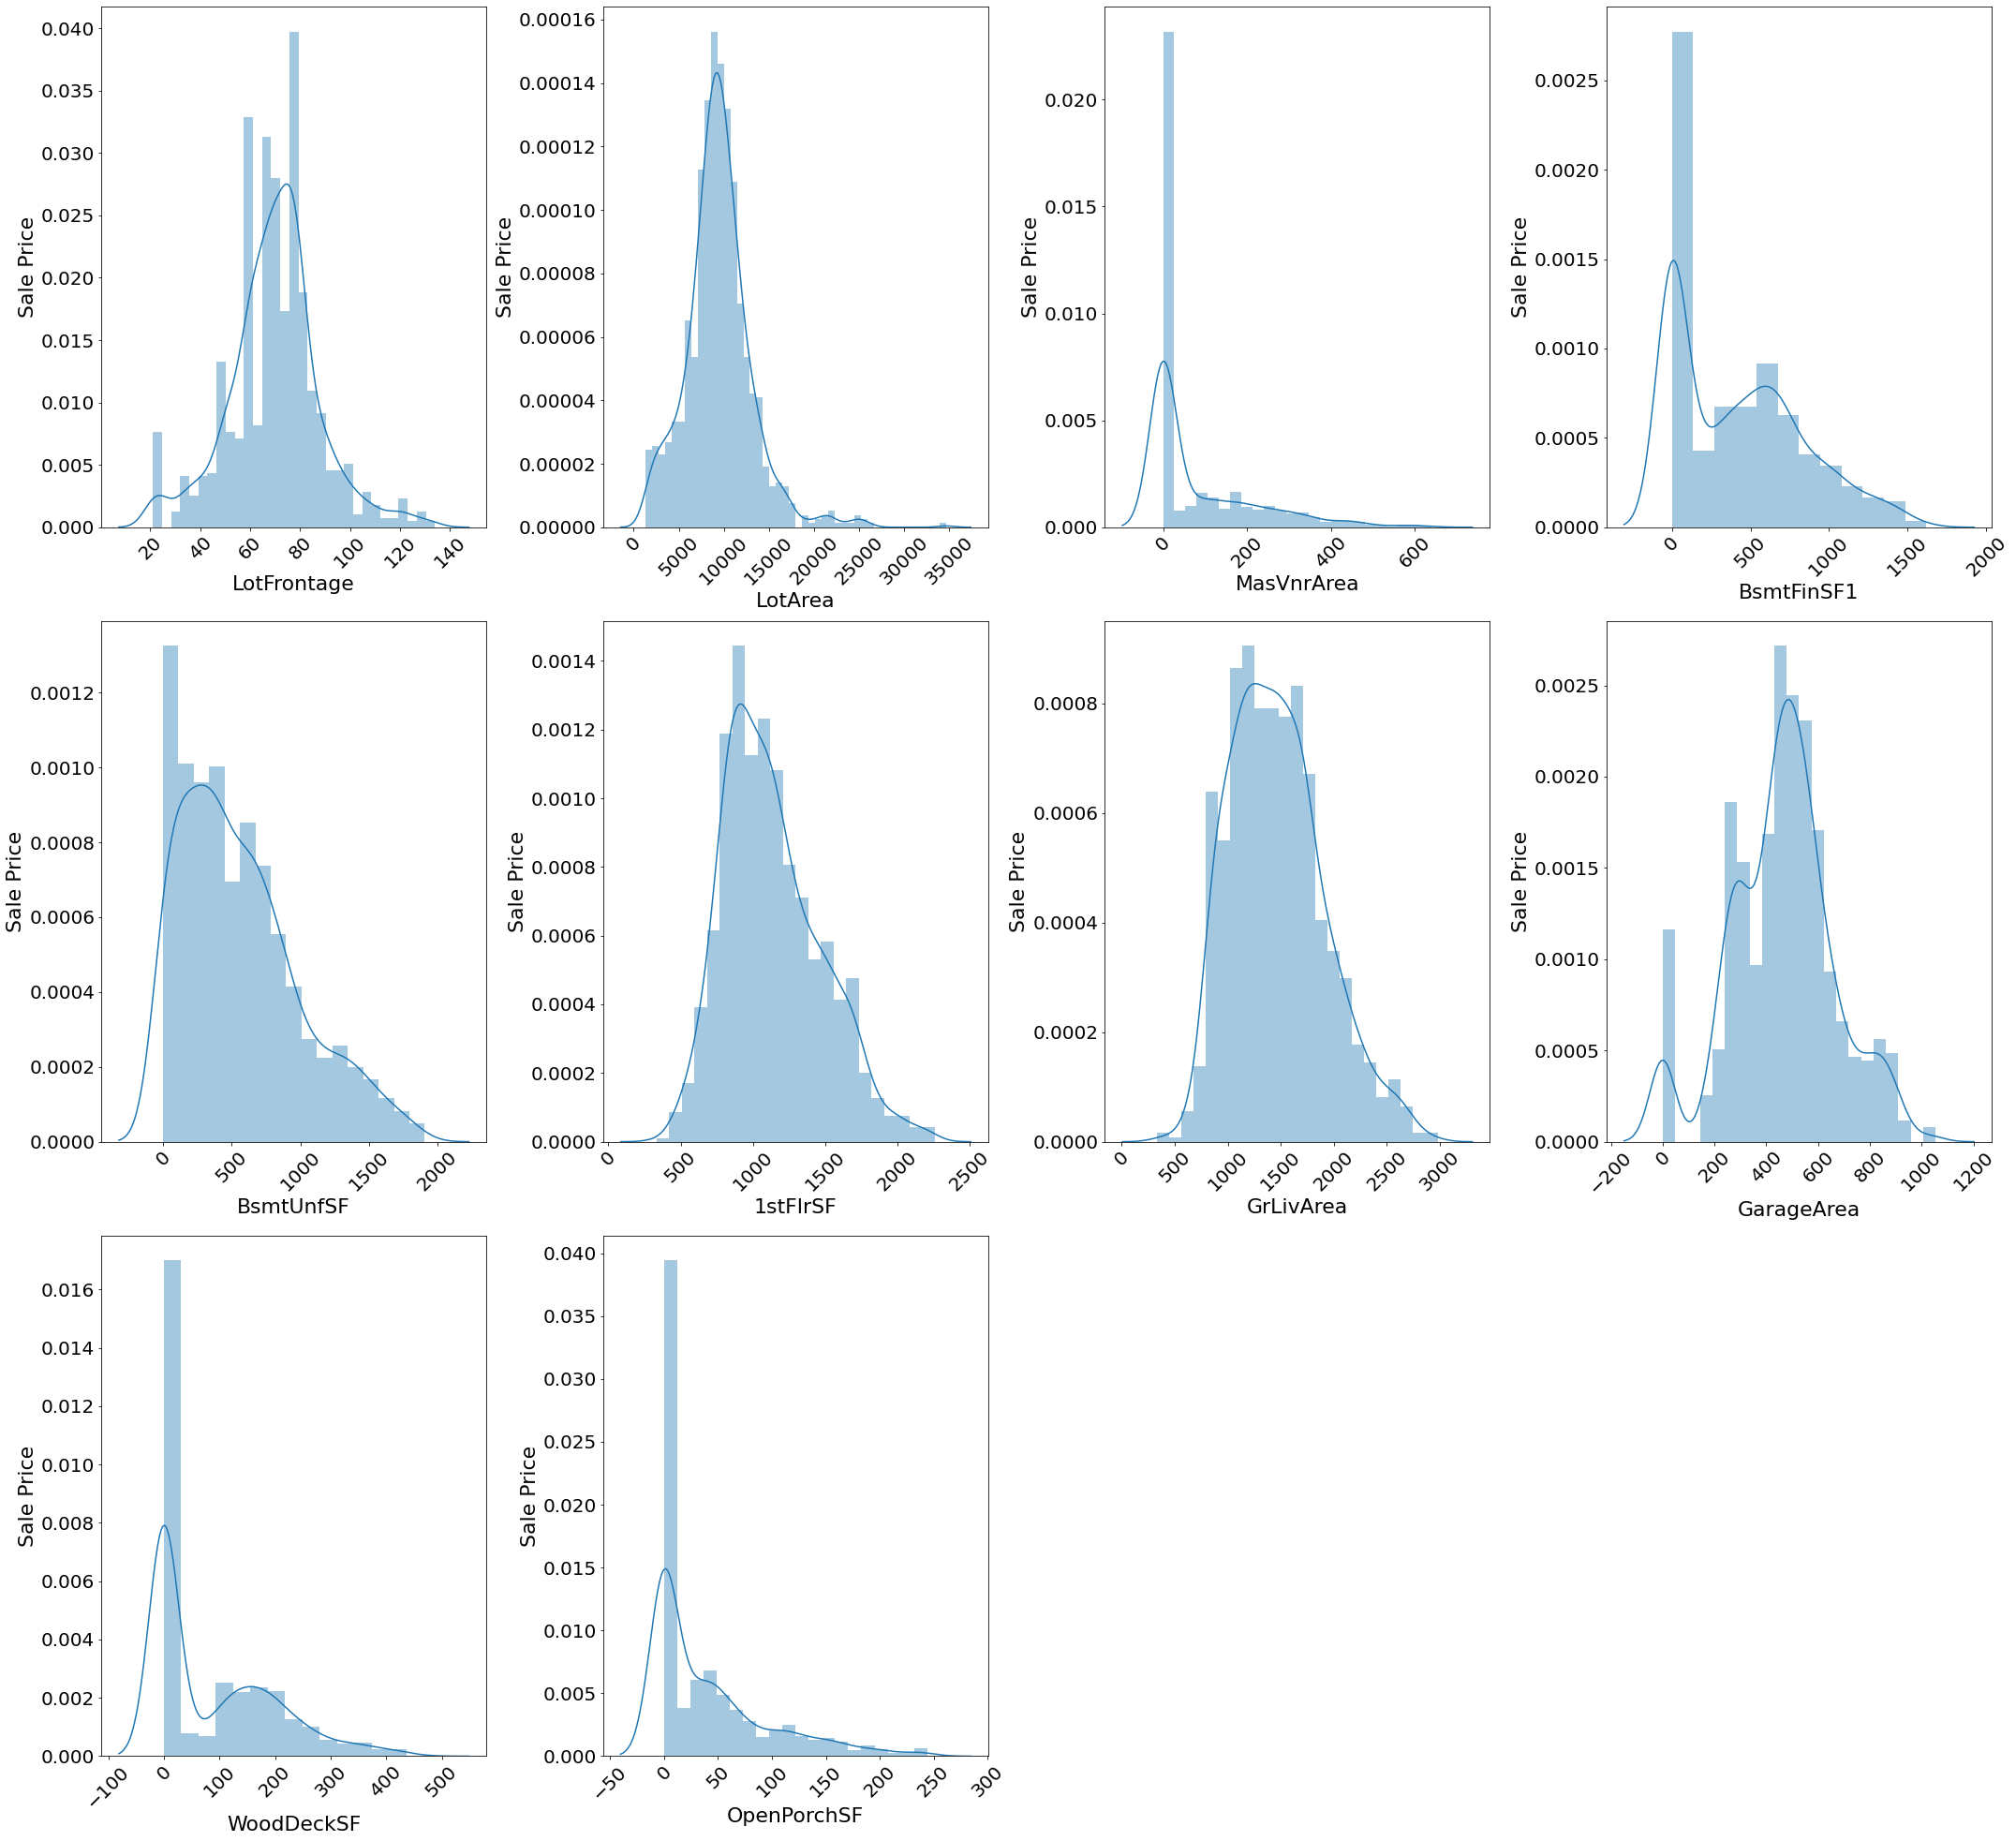

In [297]:
plt.figure(figsize=(30,90))
plotnumber=1

for col in outliers:
    if plotnumber<=38:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(x_train[col])
        plt.xlabel(col,fontsize=22)
        plt.ylabel('Sale Price',fontsize=22)
        plt.xticks(fontsize=20,rotation=45)
        plt.yticks(fontsize=20)
        plotnumber+=1
plt.tight_layout()

In [74]:
from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder(categories=[['Reg','IR1','IR2','IR3'],
                                       ['Lvl','Bnk','HLS','Low'],
                                       ['ELO','NoSeWa','NoSewr','AllPub'],
                                      ['Gtl','Mod','Sev'],
                                      ['1Fam','2fmCon','Duplex','TwnhsE','Twnhs'],
                                      ['1Story','1.5Unf','1.5Fin','2Story','2.5Unf','2.5Fin','SFoyer','SLvl'],
                                      ['NA','No','Mn','Av','Gd'],
                                      ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
                                      ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
                                      ['FuseP','FuseF','FuseA','Mix','SBrkr'],
                                      ['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],
                                      ['NA','Detchd','CarPort','BuiltIn','Basment','Attchd','2Types'],
                                      ['NA','Unf','RFn','Fin'],
                                      ['N','P','Y'],
                                      ['NA','MnWw','GdWo','MnPrv','GdPrv']])

df1=ord_encoder.fit_transform(x_train[['LotShape','LandContour','Utilities',
                                       'LandSlope','BldgType','HouseStyle',
                                       'BsmtExposure','BsmtFinType1','BsmtFinType2',
                                      'Electrical','Functional','GarageType',
                                      'GarageFinish','PavedDrive','Fence']])
df1
x_train[['LotShape','LandContour','Utilities','LandSlope','BldgType','HouseStyle',
         'BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','Functional','GarageType',
         'GarageFinish','PavedDrive','Fence']]=df1

In [75]:
ord_encoder=OrdinalEncoder(categories=[['NA','Po','Fa','TA','Gd','Ex'],
                                      ['NA','Po','Fa','TA','Gd','Ex'],
                                      ['NA','Po','Fa','TA','Gd','Ex'],
                                      ['NA','Po','Fa','TA','Gd','Ex'],
                                      ['NA','Po','Fa','TA','Gd','Ex'],
                                      ['NA','Po','Fa','TA','Gd','Ex'],
                                      ['NA','Po','Fa','TA','Gd','Ex'],
                                      ['NA','Po','Fa','TA','Gd','Ex'],
                                      ['NA','Po','Fa','TA','Gd','Ex'],
                                      ['NA','Po','Fa','TA','Gd','Ex']])
df1=ord_encoder.fit_transform(x_train[['ExterQual','ExterCond','BsmtQual','BsmtCond',
                                     'HeatingQC','KitchenQual','FireplaceQu','GarageQual',
                                     'GarageCond','PoolQC']])

In [76]:
x_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street  LotShape  \
0  127         120       RL     76.86385     4928   Pave       1.0   
1  889          20       RL     95.00000    15865   Pave       1.0   
2  793          60       RL     92.00000     9920   Pave       1.0   
3  110          20       RL    105.00000    11751   Pave       1.0   
4  422          20       RL     76.86385    16635   Pave       1.0   

   LandContour  Utilities LotConfig  LandSlope Neighborhood Condition1  \
0          0.0        3.0    Inside        0.0      NPkVill       Norm   
1          0.0        3.0    Inside        1.0        NAmes       Norm   
2          0.0        3.0   CulDSac        0.0      NoRidge       Norm   
3          0.0        3.0    Inside        0.0       NWAmes       Norm   
4          0.0        3.0       FR2        0.0       NWAmes       Norm   

  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm       3.0         0.0            6            5       1976   
1       Norm       0.0         0.0            8            6       1970   
2       Norm       0.0         3.0            7            5       1996   
3       Norm       0.0         0.0            6            6       1977   
4       Norm       0.0         0.0            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           1.0   
1         0.0        Gd        Gd      PConc       TA       Gd           4.0   
2         0.0        Gd        TA      PConc       Gd       TA           3.0   
3       480.0        TA        TA     CBlock       Gd       TA           1.0   
4       126.0        Gd        TA     CBlock       Gd       TA           1.0   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0           5.0         120           1.0           0        958         1078   
1           5.0         351           3.0         823       1043         2217   
2           6.0         862           1.0           0        255         1117   
3           4.0         705           1.0           0       1139         1844   
4           5.0        1246           1.0           0        356         1602   

  Heating HeatingQC CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y         4.0       958         0             0   
1    GasA        Ex          Y         4.0      2217         0             0   
2    GasA        Ex          Y         4.0      1127       886             0   
3    GasA        Ex          Y         4.0      1844         0             0   
4    GasA        Gd          Y         4.0      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd  Functional  Fireplaces FireplaceQu  \
0             1          TA             5         7.0           1          TA   
1             1          Gd             8         7.0           1          TA   
2             1          TA             8         7.0           1          TA   
3     

In [77]:
new_cat_col=list(x_train.select_dtypes(include='object'))
new_cat_col

['MSZoning',
 'Street',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'FireplaceQu',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [78]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [79]:
for col in new_cat_col:
    df=lab_enc.fit_transform(x_train[col])
    pd.Series(df)
    x_train[col]=df

In [80]:
x_train.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0  127         120         3     76.86385     4928       1       1.0   
1  889          20         3     95.00000    15865       1       1.0   
2  793          60         3     92.00000     9920       1       1.0   
3  110          20         3    105.00000    11751       1       1.0   
4  422          20         3     76.86385    16635       1       1.0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0          0.0        3.0          4        0.0            13           2   
1          0.0        3.0          4        1.0            12           2   
2          0.0        3.0          1        0.0            15           2   
3          0.0        3.0          4        0.0            14           2   
4          0.0        3.0          2        0.0            14           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2       3.0         0.0            6            5       1976   
1           2       0.0         0.0            8            6       1970   
2           2       0.0         3.0            7            5       1996   
3           2       0.0         0.0            6            6       1977   
4           2       0.0         0.0            6            7       1977   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          1976          1         0            8            9           2   
1          1970          0         3           12           13           2   
2          1997          1         0            7            7           2   
3          1977          3         0            8            9           1   
4          2000          1         0            4            4           3   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0         0.0          3          4           1         2         4   
1         0.0          2          2           2         4         1   
2         0.0          2          4           2         2         4   
3       480.0          3          4           1         2         4   
4       126.0          2          4           1         2         4   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0           1.0           5.0         120           1.0           0   
1           4.0           5.0         351           3.0         823   
2           3.0           6.0         862           1.0           0   
3           1.0           4.0         705           1.0           0   
4           1.0           5.0        1246           1.0           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        958         1078        1          4           1         4.0   
1       1043         2217        1          0           1         4.0   
2        255         1117        1          0           1         4.0   
3       1139         1844        1          0           1         4.0   
4        356         1602        1          2           1         4.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       958         0             0        958             0             0   
1      2217         0             0       2217             1             0   
2      1127       886             0       2013             1             0   
3      1844         0             0       1844             0             0   
4      1602         0             0       1602             0             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         0             2             1            3             5   
1         2         0             4             1            2             8   
2         2         1             3             1            3             8   
3         2         0             3             1            3             7   
4         2         

In [81]:
x_train['Age']=x_train['YrSold']-x_train['YearBuilt'] #new feature added
x_train['EffectiveAge']=x_train['YrSold']-x_train['YearRemodAdd'] #new feature added

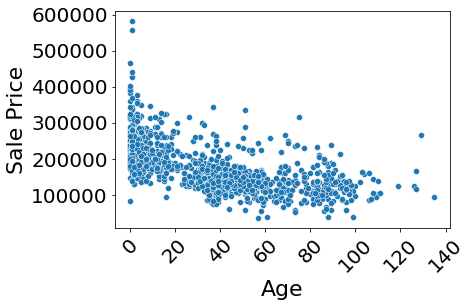

In [84]:
sns.scatterplot(x=x_train['Age'],y=x_train['SalePrice'])
plt.xlabel('Age',fontsize=22)
plt.ylabel('Sale Price',fontsize=22)
plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.savefig('img13.png')

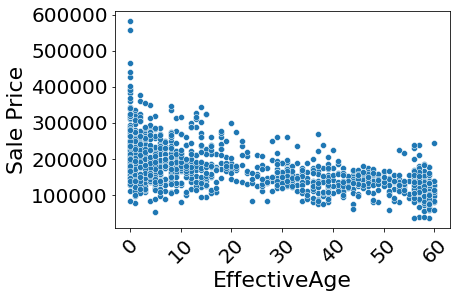

In [85]:
sns.scatterplot(x=x_train['EffectiveAge'],y=x_train['SalePrice'])
plt.xlabel('EffectiveAge',fontsize=22)
plt.ylabel('Sale Price',fontsize=22)
plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.savefig('img14.png')

In [86]:
x_train.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0  127         120         3     76.86385     4928       1       1.0   
1  889          20         3     95.00000    15865       1       1.0   
2  793          60         3     92.00000     9920       1       1.0   
3  110          20         3    105.00000    11751       1       1.0   
4  422          20         3     76.86385    16635       1       1.0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0          0.0        3.0          4        0.0            13           2   
1          0.0        3.0          4        1.0            12           2   
2          0.0        3.0          1        0.0            15           2   
3          0.0        3.0          4        0.0            14           2   
4          0.0        3.0          2        0.0            14           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2       3.0         0.0            6            5       1976   
1           2       0.0         0.0            8            6       1970   
2           2       0.0         3.0            7            5       1996   
3           2       0.0         0.0            6            6       1977   
4           2       0.0         0.0            6            7       1977   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          1976          1         0            8            9           2   
1          1970          0         3           12           13           2   
2          1997          1         0            7            7           2   
3          1977          3         0            8            9           1   
4          2000          1         0            4            4           3   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0         0.0          3          4           1         2         4   
1         0.0          2          2           2         4         1   
2         0.0          2          4           2         2         4   
3       480.0          3          4           1         2         4   
4       126.0          2          4           1         2         4   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0           1.0           5.0         120           1.0           0   
1           4.0           5.0         351           3.0         823   
2           3.0           6.0         862           1.0           0   
3           1.0           4.0         705           1.0           0   
4           1.0           5.0        1246           1.0           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        958         1078        1          4           1         4.0   
1       1043         2217        1          0           1         4.0   
2        255         1117        1          0           1         4.0   
3       1139         1844        1          0           1         4.0   
4        356         1602        1          2           1         4.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       958         0             0        958             0             0   
1      2217         0             0       2217             1             0   
2      1127       886             0       2013             1             0   
3      1844         0             0       1844             0             0   
4      1602         0             0       1602             0             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         0             2             1            3             5   
1         2         0             4             1            2             8   
2         2         1             3             1            3             8   
3         2         0             3             1            3             7   
4         2         

In [87]:
x_train.drop(columns=['Id','YearBuilt','YearRemodAdd','YrSold'],inplace=True)

In [369]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1077 entries, 0 to 1167
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1077 non-null   int64  
 1   MSZoning       1077 non-null   int32  
 2   LotFrontage    1077 non-null   float64
 3   LotArea        1077 non-null   int64  
 4   Street         1077 non-null   int32  
 5   LotShape       1077 non-null   float64
 6   LandContour    1077 non-null   float64
 7   Utilities      1077 non-null   float64
 8   LotConfig      1077 non-null   int32  
 9   LandSlope      1077 non-null   float64
 10  Neighborhood   1077 non-null   int32  
 11  Condition1     1077 non-null   int32  
 12  Condition2     1077 non-null   int32  
 13  BldgType       1077 non-null   float64
 14  HouseStyle     1077 non-null   float64
 15  OverallQual    1077 non-null   int64  
 16  OverallCond    1077 non-null   int64  
 17  RoofStyle      1077 non-null   int32  
 18  RoofMatl

In [312]:
x_train.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0  127         120         3     76.86385     4928       1       1.0   
1  889          20         3     95.00000    15865       1       1.0   
2  793          60         3     92.00000     9920       1       1.0   
3  110          20         3    105.00000    11751       1       1.0   
4  422          20         3     76.86385    16635       1       1.0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0          0.0        3.0          4        0.0            13           2   
1          0.0        3.0          4        1.0            12           2   
2          0.0        3.0          1        0.0            15           2   
3          0.0        3.0          4        0.0            14           2   
4          0.0        3.0          2        0.0            14           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  \
0           2       3.0         0.0            6            5          1   
1           2       0.0         0.0            8            6          0   
2           2       0.0         3.0            7            5          1   
3           2       0.0         0.0            6            6          3   
4           2       0.0         0.0            6            7          1   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
0         0            8            9           2         0.0          3   
1         3           12           13           2         0.0          2   
2         0            7            7           2         0.0          2   
3         0            8            9           1       480.0          3   
4         0            4            4           3       126.0          2   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          4           1         2         4           1.0           5.0   
1          2           2         4         1           4.0           5.0   
2          4           2         2         4           3.0           6.0   
3          4           1         2         4           1.0           4.0   
4          4           1         2         4           1.0           5.0   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  \
0         120           1.0           0        958         1078        1   
1         351           3.0         823       1043         2217        1   
2         862           1.0           0        255         1117        1   
3         705           1.0           0       1139         1844        1   
4        1246           1.0           0        356         1602        1   

   HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0          4           1         4.0       958         0             0   
1          0           1         4.0      2217         0             0   
2          0           1         4.0      1127       886             0   
3          0           1         4.0      1844         0             0   
4          2           1         4.0      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             1            3             5         7.0           1   
1             1            2             8         7.0           1   
2             1            3             8         7.0           1   
3             1            3             7         7.0           1   
4             1 

In [88]:
x_train.shape

(1077, 78)

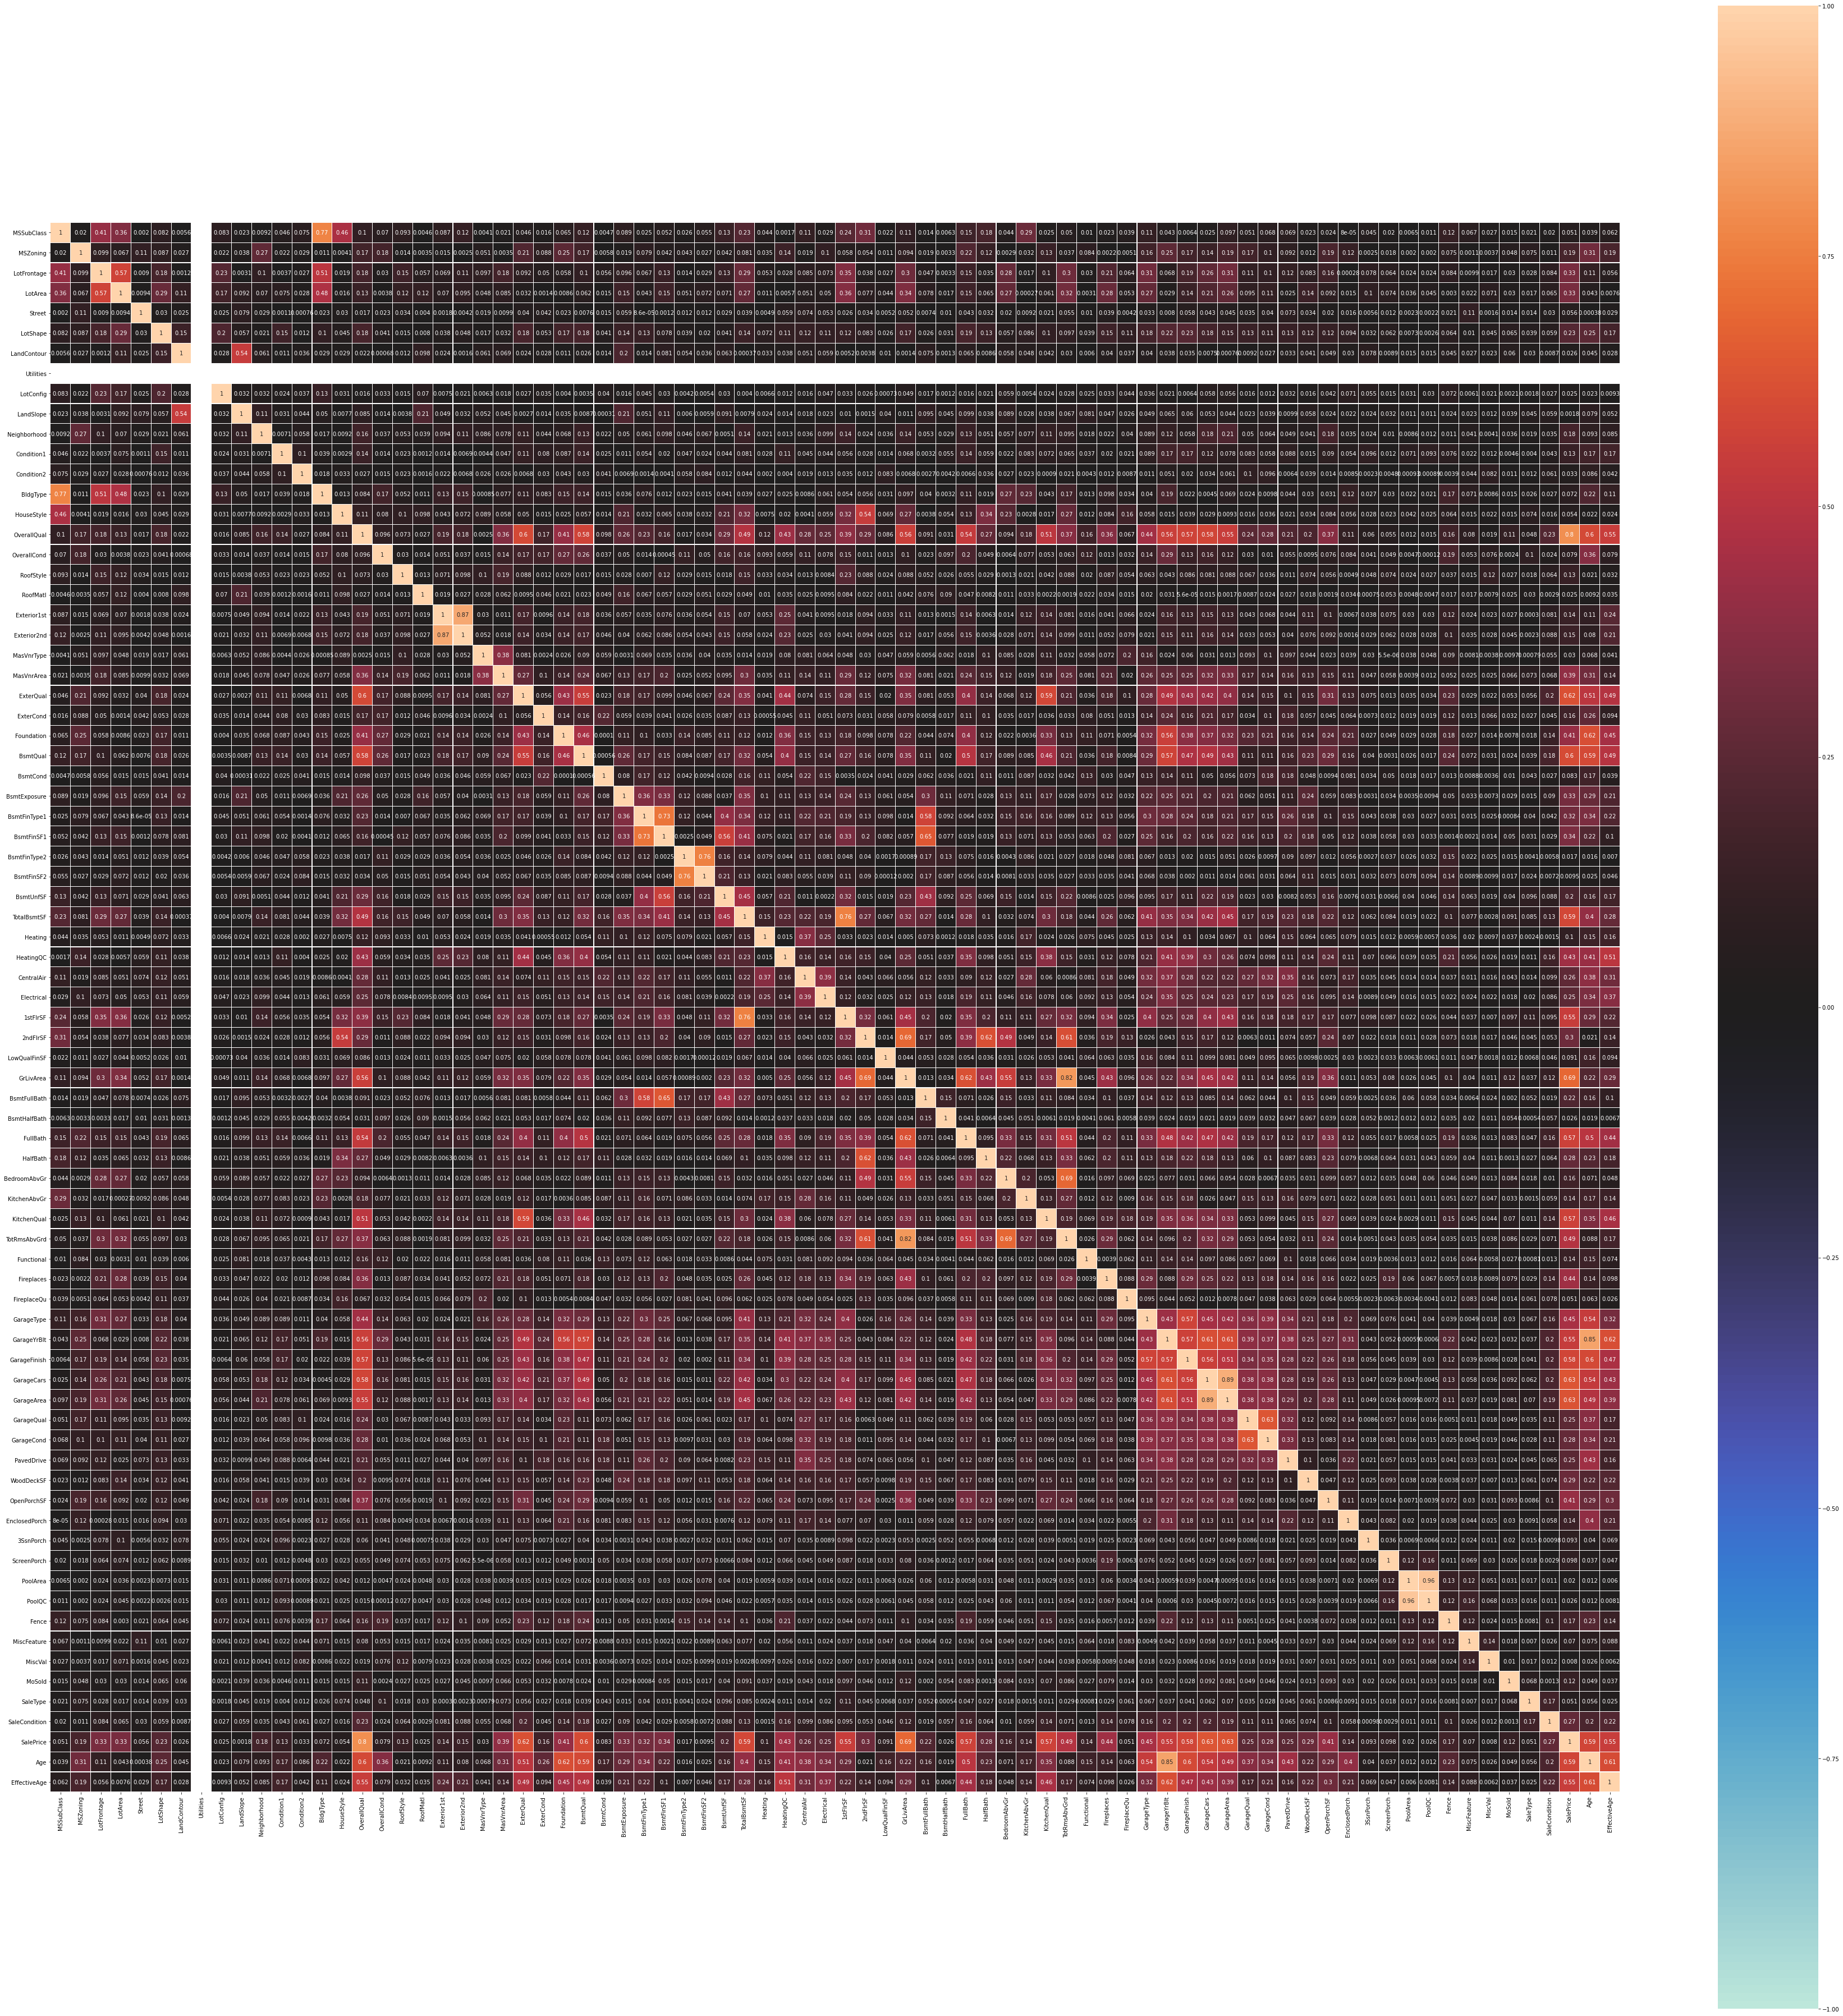

In [89]:
corr=x_train.corr().abs()
plt.figure(figsize=(50,50))
sns.heatmap(corr, vmin=-1,vmax=1, annot=True,
            square=True, center=0, fmt='.2g',linewidths=.1)
plt.savefig('img15.png')
plt.tight_layout()

In [90]:
cor_feature=['Exterior2nd','GarageCars','PoolArea']
x_train.drop(columns=cor_feature,inplace=True)
x_train.shape

(1077, 75)

In [91]:
X = x_train.drop('SalePrice', axis=1)
y = x_train['SalePrice']

In [92]:
from sklearn.feature_selection import SelectKBest,f_classif
best_features=SelectKBest(score_func=f_classif,k=25)
fit=best_features.fit(X,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)

#concatenate dataframes
feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature','Score'] #name output columns
print(feature_scores.nlargest(25,'Score')) #print 25 best features

         Feature     Score
15   OverallQual  5.014290
68       MiscVal  3.817487
22     ExterQual  3.398043
41     GrLivArea  2.775751
56    GarageArea  2.478287
48   KitchenQual  2.343007
55  GarageFinish  2.334723
44      FullBath  2.325161
25      BsmtQual  2.298349
72           Age  2.282486
33   TotalBsmtSF  2.148147
54   GarageYrBlt  2.110620
38      1stFlrSF  1.949937
73  EffectiveAge  1.859676
1       MSZoning  1.758118
34       Heating  1.684122
4         Street  1.680351
29    BsmtFinSF1  1.651374
21    MasVnrArea  1.619753
53    GarageType  1.601564
24    Foundation  1.586500
51    Fireplaces  1.569683
36    CentralAir  1.560496
49  TotRmsAbvGrd  1.537483
61   OpenPorchSF  1.500420


In [377]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [378]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [379]:
models = [['LinearRegression : ', LinearRegression()],
          ['Lasso : ', Lasso()],
          ['Ridge : ', Ridge()],
          ['KNeighborsRegressor : ', KNeighborsRegressor()],
          ['DecisionTreeRegressor : ', DecisionTreeRegressor()],
          ['RandomForestRegressor : ', RandomForestRegressor()],
          ['AdaBoostRegressor : ', AdaBoostRegressor()],
          ['GradientBoostingRegressor : ', GradientBoostingRegressor()],
          ['XGBRegressor : ', XGBRegressor()]]

In [380]:
for name, model in models:
    model=model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

LinearRegression :  23974.88978402082
Lasso :  23970.7760972778
Ridge :  23944.14543666835
KNeighborsRegressor :  37154.56858991657
DecisionTreeRegressor :  35771.84802834434
RandomForestRegressor :  25153.366893156377
AdaBoostRegressor :  30269.53971163037
GradientBoostingRegressor :  21712.506300530556
XGBRegressor :  23723.649771272856


In [381]:
algorithms = {
    'DecisionTreeRegressor' : {
        'model' : DecisionTreeRegressor(),
        'param' : {
            'max_depth' : [3, 5, 7, 9, 11, 13, 15,20,25,50],
            'min_samples_leaf' : [3, 5, 7,13,15,20,50,100],
            'min_samples_split' : [3, 5, 7,13,15,20,50,100],
        }
    },
    'XGBRegressor' : {
        'model' : XGBRegressor(),
        'param' : {
            'learning_rate' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15,20,25,50],
            'gamma' : [0.1,0.2, 0.3, 0.4, 0.5],
            'min_child_weight' : [1, 3, 5, 7, 9,13,15,20],
            'colsample_bytree' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30]
        }
    },
    'RandomForestRegressor' : {
        'model' : RandomForestRegressor(),
        'param' : {
            'n_estimators' : [10,20,50,100, 300, 500, 700, 1000, 2100],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15,20,50],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8,10,15,20]
        }
    },
    'GradientBoostingRegressor' : {
        'model' : GradientBoostingRegressor(),
        'param' : {
            'learning_rate' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30],
            'n_estimators' : [10,20,50,100,300, 500, 700, 1000, 2100],
            'criterion' : ['friedman_mse', 'mse']
        }
    }
}

In [382]:
score = []

for name, mp in algorithms.items() :
    rs = RandomizedSearchCV(estimator = mp['model'], param_distributions = mp['param'], cv = 10, n_jobs=-1, verbose=3)
    rs.fit(X_train, y_train)
    score.append({
        'model': name,
        'score' : rs.best_score_,
        'params' : rs.best_params_
    })

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.4s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.0min finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished


In [383]:
performance = pd.DataFrame(score, columns=['model', 'score', 'params'])
performance

model     score  \
0      DecisionTreeRegressor  0.763903   
1               XGBRegressor  0.886760   
2      RandomForestRegressor  0.861762   
3  GradientBoostingRegressor  0.882652   

                                              params  
0  {'min_samples_split': 15, 'min_samples_leaf': ...  
1  {'min_child_weight': 7, 'max_depth': 5, 'learn...  
2  {'n_estimators': 2100, 'min_samples_split': 8,...  
3  {'n_estimators': 300, 'learning_rate': 0.1, 'c...

The performance of XG Boost is better than any other model. Hence, XGB Regressor is selected as our final model

In [384]:
performance['params'][1]

{'min_child_weight': 7,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.3}

In [385]:
final_model = XGBRegressor(min_child_weight=7, max_depth=5, learning_rate=0.1, gamma=0.4, colsample_bytree=0.3)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
print('RMSE of XGBRegressor : {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

RMSE of XGBRegressor : 21176.249329693466


In [386]:
final_model.score(X_train, y_train), final_model.score(X_test, y_test)

(0.9836346020822703, 0.8911471681342112)

In [387]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 14390.131828703703
RMSE: 21176.249329693466


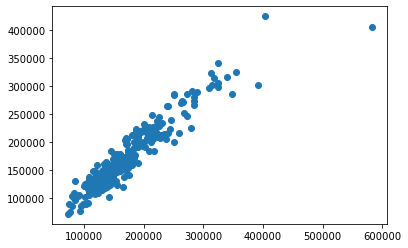

In [388]:
plt.scatter(y_test,y_pred)

XGBoost Regressor is selected as final model for prediction of flight price as its performance is better than any other model. Now lets use our test data set to predict the flight price. But before that we need to format the test set in the same way as done for training data set.

In [389]:
test_data=pd.read_csv('test.csv')

In [390]:
test_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

In [391]:
test_set=test_data

In [392]:
test_set.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [393]:
test_set.drop(columns='Alley',inplace=True)

In [398]:
test_set['BsmtQual'].fillna('NA',inplace=True)
test_set['BsmtQual'].fillna('NA',inplace=True)
test_set['BsmtCond'].fillna('NA',inplace=True)
test_set['BsmtExposure'].fillna('NA',inplace=True)
test_set['BsmtFinType1'].fillna('NA',inplace=True)
test_set['BsmtFinType2'].fillna('NA',inplace=True)
test_set['FireplaceQu'].fillna('NA',inplace=True)
test_set['GarageType'].fillna('NA',inplace=True)
test_set['GarageFinish'].fillna('NA',inplace=True)
test_set['GarageQual'].fillna('NA',inplace=True)
test_set['GarageCond'].fillna('NA',inplace=True)
index=test_set.index[test_set['GarageYrBlt'].isna()]
for i in index:
    test_set.loc[i,'GarageYrBlt']=test_set.loc[i,'YearBuilt']
test_set['MasVnrType'].fillna('None',inplace=True)
test_set['MasVnrArea'].fillna(0,inplace=True)
test_set['PoolQC'].fillna('NA',inplace=True)
test_set['Fence'].fillna('NA',inplace=True)
test_set['MiscFeature'].fillna('NA',inplace=True)
test_set['LotFrontage'].fillna(test_set.groupby(['LotShape','LandContour'])['LotFrontage'].transform('mean'),inplace=True)

In [399]:
test_set.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      1
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [400]:
test_set.dropna(inplace=True)

In [401]:
test_set.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [402]:
ord_encoder=OrdinalEncoder(categories=[['Reg','IR1','IR2','IR3'],
                                       ['Lvl','Bnk','HLS','Low'],
                                       ['ELO','NoSeWa','NoSewr','AllPub'],
                                      ['Gtl','Mod','Sev'],
                                      ['1Fam','2fmCon','Duplex','TwnhsE','Twnhs'],
                                      ['1Story','1.5Unf','1.5Fin','2Story','2.5Unf','2.5Fin','SFoyer','SLvl'],
                                      ['NA','No','Mn','Av','Gd'],
                                      ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
                                      ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
                                      ['FuseP','FuseF','FuseA','Mix','SBrkr'],
                                      ['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],
                                      ['NA','Detchd','CarPort','BuiltIn','Basment','Attchd','2Types'],
                                      ['NA','Unf','RFn','Fin'],
                                      ['N','P','Y'],
                                      ['NA','MnWw','GdWo','MnPrv','GdPrv']])

df1=ord_encoder.fit_transform(test_set[['LotShape','LandContour','Utilities',
                                       'LandSlope','BldgType','HouseStyle',
                                       'BsmtExposure','BsmtFinType1','BsmtFinType2',
                                      'Electrical','Functional','GarageType',
                                      'GarageFinish','PavedDrive','Fence']])
df1
test_set[['LotShape','LandContour','Utilities','LandSlope','BldgType','HouseStyle',
         'BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','Functional','GarageType',
         'GarageFinish','PavedDrive','Fence']]=df1

ord_encoder=OrdinalEncoder(categories=[['NA','Po','Fa','TA','Gd','Ex'],
                                      ['NA','Po','Fa','TA','Gd','Ex'],
                                      ['NA','Po','Fa','TA','Gd','Ex'],
                                      ['NA','Po','Fa','TA','Gd','Ex'],
                                      ['NA','Po','Fa','TA','Gd','Ex'],
                                      ['NA','Po','Fa','TA','Gd','Ex'],
                                      ['NA','Po','Fa','TA','Gd','Ex'],
                                      ['NA','Po','Fa','TA','Gd','Ex'],
                                      ['NA','Po','Fa','TA','Gd','Ex'],
                                      ['NA','Po','Fa','TA','Gd','Ex']])
df1=ord_encoder.fit_transform(test_set[['ExterQual','ExterCond','BsmtQual','BsmtCond',
                                     'HeatingQC','KitchenQual','FireplaceQu','GarageQual',
                                     'GarageCond','PoolQC']])

for col in new_cat_col:
    df=lab_enc.fit_transform(test_set[col])
    pd.Series(df)
    test_set[col]=df
    
test_set['Age']=test_set['YrSold']-test_set['YearBuilt'] #new feature added
test_set['EffectiveAge']=test_set['YrSold']-test_set['YearRemodAdd'] #new feature added

test_set.drop(columns=['Id','YearBuilt','YearRemodAdd','YrSold'],inplace=True)

test_set.drop(columns=cor_feature,inplace=True)
test_set.shape

(290, 74)

In [403]:
predicted=pd.DataFrame({'Predicted Price':(final_model.predict(test_set))})

In [405]:
test_data=pd.read_csv('test.csv')

In [406]:
df_pred=pd.concat([test_data,predicted],axis=1)

In [407]:
df_pred.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

In [408]:
import pickle
with open ('HousingPricePrediction.sav','wb') as f:
    pickle.dump(final_model,f)